# Working with Time Series
## Dates and Times in Python
### Nativr Python dates and times: datetime and dateutil

In [1]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
from dateutil import parser
date = parser.parse("4th of July, 2015")

In [3]:
date.strftime('%A')

'Saturday'

### Typed arrays of times: NumPy's datetime64

In [4]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [5]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [6]:
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [7]:
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

Description of date and teim codes

| Code | Meaning | Time span (relative) | Time span (absolute) |
| --- | --- | --- | --- |
| Y | Year | +-9.2e18 years | [9.2e18BC, 9.2e18AD] |
| M | Month | +-7.6e17 years | [7.6e17BC, 7.6e17AD] |
| W | Week | +-1.7e17 years | [1.7e17BC, 1.7e17AD] |
| D | Day | +-2.5e16 years | [2.5e16BC, 2.5e16AD] |
| h | Hour | +-1.0e15 years | [1.0e15BC, 1.0e15AD] |
| m | Minute | +-1.7e13 years | [1.7e13BC, 1.7e13AD] |
| s | Second | +-2.9e12 years | [2.9e9BC, 2.9e9AD] |
| ms | Milliscond | +-2.9e9 years | [2.9e6BC, 2.9e6AD] |
| us | Microsecond | +-2.9e6 years | [29301 BC, 294241 AD] |
| ns | Nanosecond | +-292 years | [1678 AD, 2262 AD] |
| ps | Picosecond | +-106 days | [1969 AD, 1970 AD] |
| fs | Femtosecond | +-2.6 hours | [1969 AD, 1970 AD] |
| as | Attosecond | +-9.2 seconds | [1069 AD, 1970 AD] |

For the types of data we see in the real world, a useful default is datetime64[ns], as it can encode a useful range of modern dates with a suitably fine precision.

### Dates and times in Pandas: Best of both worlds

In [8]:
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [9]:
date.strftime('%A')

'Saturday'

In [10]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas Time Series: Indexing by Time

In [11]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [12]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [14]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

## Pandas Time Series Data Structures

- For *tine stamps*, Pandas provides the timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetim64 data type. the associated index structure is DateimtIndex.
- For *time periods*, Pandas provides the Period type. This encodes a fixed frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.
- For *tine deltas* or *durations*, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is base don numpy.timedelta64. The associated index structure is TimedeltaIndex.

pd.to_datetime() function: Passing a single date to pd.to_datetime() yields a Timestamp; passing a series of dates by default yields a DatetimeIndex:

In [15]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [16]:
# Any DatetimeIndex can be converted to a PeriodIndex with the to_period() function with 
# the addition of a frequency code
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [17]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular sequences: pd.date_range()
pd.date_range()

pd.period_range()

pd.timedelta_range()

In [18]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [21]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [22]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

## Frequencies and Offsets

Listing of Pandas frequency codes

| Code | Description | Code | Description |
| --- | --- | --- | --- |
| D | Calendar day | B | Business day |
| W | Weekly |
| M | Month end | BM | Business month end |
| Q | Quarter end | BQ | Business quarter end |
| A | Year end | BA | Business year end |
| H | Hours | BH | Business hours |
| T | Minutes |
| S | Seconds |
| L | Milliseconds |
| U | Microseconds |
| N | Nanoseconds |

The monthly, quarterly, and annual frequencies are all marked at the end of the specified period. Adding an S suffix to any of these marks it instead at the beginning.

| Code | Description |
| --- | --- |
| MS | Month start |
| BMS | Business month start |
| QS | Quarter start |
| BQS | Business quarter start |
| AS | Year start |
| BAS | Business year start |

Additionally, you can change the month used to mark any quarterly or annual code by adding a three-letter month code as a suffix:

- Q-JAN, BQ-FEB, QS-MAR, BQS-APR, etc.
- A-JAN, BA-FEB, AS-MAR, BAS-APR, etc.

In the same way, you can modify the split-point of the weekly frequency by adding a three-letter weekday code:

- W-SUN, W-MON, W-TUE, W-WED, etc.

In [23]:
pd.timedelta_range(0, periods=9, freq="2H30T")

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [24]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

## Resampling, Shifting, and Windowing

In [41]:
from pandas_datareader import data
goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [42]:
goog = goog['Close']

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [44]:
goog.head()

Date
2004-08-19    49.982655
2004-08-20    53.952770
2004-08-23    54.495735
2004-08-24    52.239193
2004-08-25    52.802086
Name: Close, dtype: float64

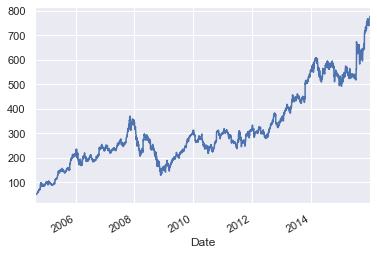

In [45]:
goog.plot();

### Resampling and converting frequencies

- resample() - data aggregation
- asfreq() - data selection

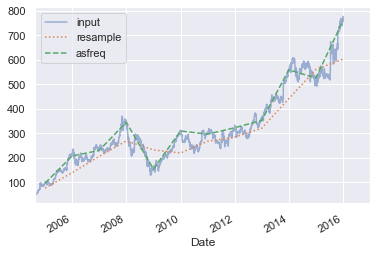

In [46]:
goog.plot(alpha=0.5, style='-')
goog.resample('BA').mean().plot(style=':')
goog.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

resample reports the average of the previous year, while as freq reports value at the end of the year

For up-sampling, resample() and asfreq() are largely equivalent, though resample has many mor e options available. In this case, the default for both methods is to leave the up-sampled points empty, - that is, filled with NA values. 

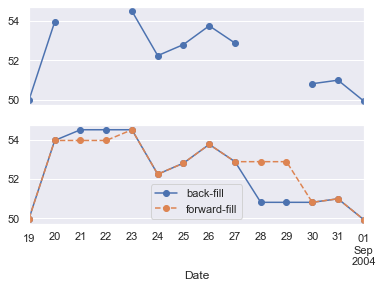

In [47]:
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the defaule: non-business days are left as NA values and do not appear on the plot. The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

### Time-shifts

- shift() - shifts the data
- tshift() - shifts the index

shift is specified in multiples of the frequency.

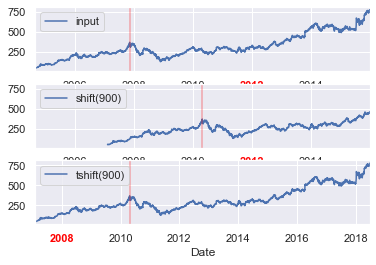

In [51]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red')

A common context for this type of shift is computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stocke over the course of the dataset.

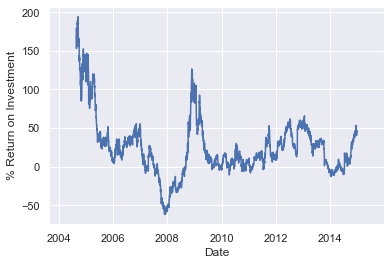

In [52]:
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

### Rolling windows

rolling()

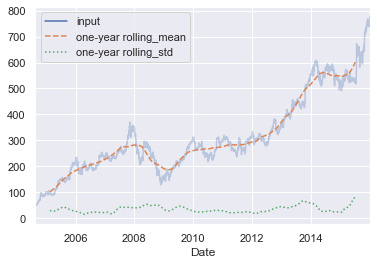

In [53]:
rolling = goog.rolling(365, center=True)

data = pd.DataFrame({'input': goog,
                    'one-year rolling_mean': rolling.mean(),
                    'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

## Example: Visualizing Seattle Bicycle Counts

In [54]:
#!curl -o Fremont_Bridge_Bicycle_Counter.csv
# https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

In [56]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [57]:
data.columns = ['Total', 'East', 'West']

In [58]:
data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [59]:
data.describe()

,Total,East,West
count,65678.000000,65678.000000,65678.000000
mean,113.397378,51.748302,61.649076
std,144.853108,66.803517,90.358214
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [60]:
data.dropna().describe()

,Total,East,West
count,65678.000000,65678.000000,65678.000000
mean,113.397378,51.748302,61.649076
std,144.853108,66.803517,90.358214
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


### Visualizing the data

In [61]:
%matplotlib inline
import seaborn; seaborn.set()

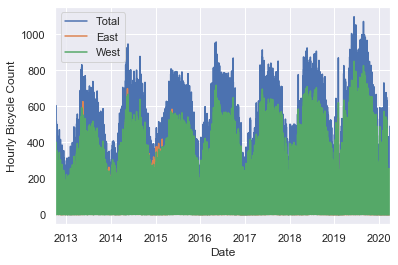

In [62]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

Text(0, 0.5, 'Weekly bicycle count')

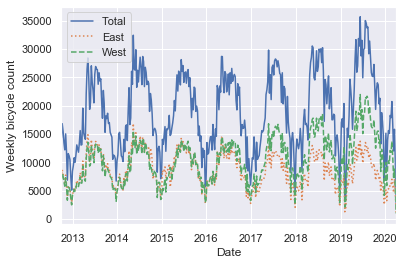

In [64]:
weekly = data.resample('W').sum()
weekly.plot(style=['-',':', '--'])
plt.ylabel('Weekly bicycle count')

Text(0, 0.5, 'mean hourly count')

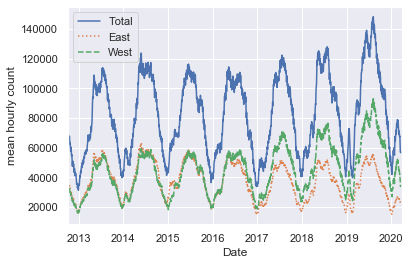

In [65]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=['-',':', '--'])
plt.ylabel('mean hourly count')

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function - for example, a Gaussian window.

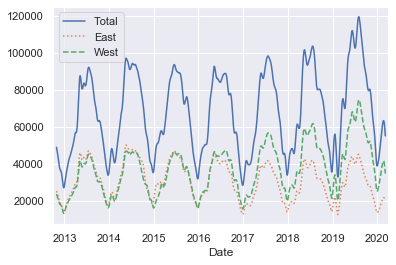

In [66]:
daily.rolling(50, center=True, win_type='gaussian').sum(std=10).plot(style=['-',':', '--']);

### Digging into the data

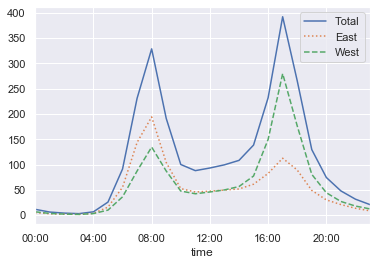

In [68]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=['-',':', '--']);

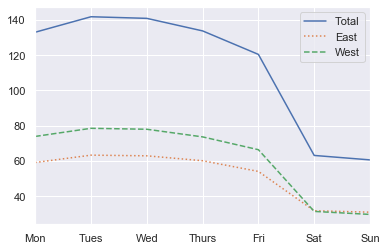

In [69]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=['-',':', '--']);

In [70]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


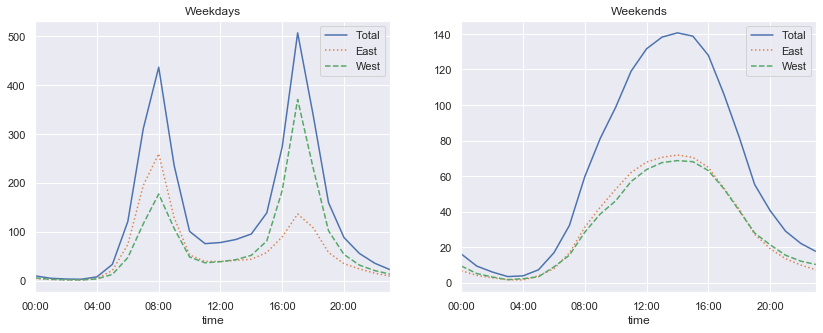

In [72]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays', 
                          xticks=hourly_ticks, style=['-',':', '--'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                          xticks=hourly_ticks, style=['-',':', '--']);

In [73]:
weekend

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], dtype='<U7')